In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from matplotlib import pyplot as plt

In [63]:
path = "/content/drive/MyDrive/Colab Notebooks/dataset/last-mp-dataset.csv"
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/models/mp_last_large_map_final"

In [64]:
df = pd.read_csv(path)
df["label"].value_counts()

F        5970
L        5970
K        5958
G        5955
J        5953
D        5951
H        5929
B        5929
A        5915
Z        5903
C        5903
R        5896
E        5892
X        5890
I        5887
P        5880
S        5836
V        5835
W        5796
O        5751
Q        5741
Y        5667
T        5530
Space    5191
M        5172
U        4371
N        3674
Name: label, dtype: int64

In [65]:
df["label"].unique()

array(['M', 'X', 'Space', 'S', 'P', 'N', 'I', 'U', 'H', 'G', 'B', 'W',
       'K', 'E', 'A', 'L', 'J', 'Q', 'C', 'R', 'O', 'D', 'T', 'V', 'F',
       'Y', 'Z'], dtype=object)

In [66]:
df.head()

,Unnamed: 0,0x,0y,1x,1y,2x,2y,3x,3y,4x,...,16y,17x,17y,18x,18y,19x,19y,20x,20y,label
0,0,0.0,0.0,-0.263195,0.168084,-0.461619,0.238870,-0.545770,0.302678,-0.478784,...,0.920620,0.421439,-0.428301,0.404070,0.039545,0.358000,0.382578,0.324619,0.636810,M
1,1,0.0,0.0,-0.263099,0.028681,-0.421139,0.147102,-0.402727,0.327252,-0.330016,...,0.951374,0.363423,0.171764,0.366473,0.455060,0.327095,0.647811,0.283990,0.788677,M
2,2,0.0,0.0,-0.317940,-0.047910,-0.503678,-0.068887,-0.492297,0.091870,-0.366191,...,0.946927,0.469347,-0.137859,0.490483,0.247974,0.477984,0.517449,0.466153,0.725181,M
3,3,0.0,0.0,-0.316733,0.100902,-0.559333,0.143377,-0.624913,0.156550,-0.485635,...,0.951110,0.561934,-0.403880,0.483950,0.065134,0.429496,0.391307,0.392375,0.634365,M
4,4,0.0,0.0,-0.284665,0.085728,-0.453299,0.167248,-0.372762,0.317592,-0.241684,...,0.934091,0.505951,-0.375049,0.536691,0.106561,0.464293,0.487019,0.407274,0.751768,M


In [67]:
x_data = df[[ '0x', '0y', '1x', '1y', '2x', '2y', '3x', '3y', 
    '4x', '4y', '5x', '5y', '6x', '6y', '7x', '7y', 
    '8x', '8y', '9x', '9y', '10x', '10y', '11x', '11y', 
    '12x', '12y', '13x', '13y', '14x', '14y', '15x', 
    '15y', '16x', '16y', '17x', '17y', '18x', '18y', 
    '19x', '19y', '20x', '20y']].values

y_data = df["label"].values

In [68]:
# scalar = MinMaxScaler()
# x_data = scalar.fit_transform(x_data)

encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)

In [69]:
encoding_maps = dict(zip(encoder.classes_,range(len(encoder.classes_))))
encoding_maps

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'Space': 19,
 'T': 20,
 'U': 21,
 'V': 22,
 'W': 23,
 'X': 24,
 'Y': 25,
 'Z': 26}

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.3, shuffle=True)

In [71]:
layers = [
    Dense(256, input_shape=(42,)),
    Dropout(.2),
    Dense(128, activation='relu'),
    Dropout(.2),
    Dense(64, activation='relu'),
    Dropout(.2),
    Dense(32, activation = 'relu'),
    Dense(27, activation = 'softmax')
]

model = Sequential(layers)

In [72]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.5).history

Epoch 1/10
1678/1678 [==============================] - 13s 7ms/step - loss: 0.4070 - accuracy: 0.8750 - val_loss: 0.0575 - val_accuracy: 0.9851
Epoch 2/10
1678/1678 [==============================] - 9s 5ms/step - loss: 0.0847 - accuracy: 0.9767 - val_loss: 0.0534 - val_accuracy: 0.9848
Epoch 3/10
1678/1678 [==============================] - 10s 6ms/step - loss: 0.0650 - accuracy: 0.9818 - val_loss: 0.0358 - val_accuracy: 0.9903
Epoch 4/10
1678/1678 [==============================] - 9s 6ms/step - loss: 0.0577 - accuracy: 0.9837 - val_loss: 0.0344 - val_accuracy: 0.9903
Epoch 5/10
1678/1678 [==============================] - 9s 5ms/step - loss: 0.0514 - accuracy: 0.9856 - val_loss: 0.0297 - val_accuracy: 0.9921
Epoch 6/10
1678/1678 [==============================] - 10s 6ms/step - loss: 0.0448 - accuracy: 0.9871 - val_loss: 0.0334 - val_accuracy: 0.9907
Epoch 7/10
1678/1678 [==============================] - 9s 5ms/step - loss: 0.0433 - accuracy: 0.9879 - val_loss: 0.0256 - val_accura

In [74]:
model.save(MODEL_PATH)

In [75]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [77]:
x = [1,2,3,4,5,6,7,8,9,10]

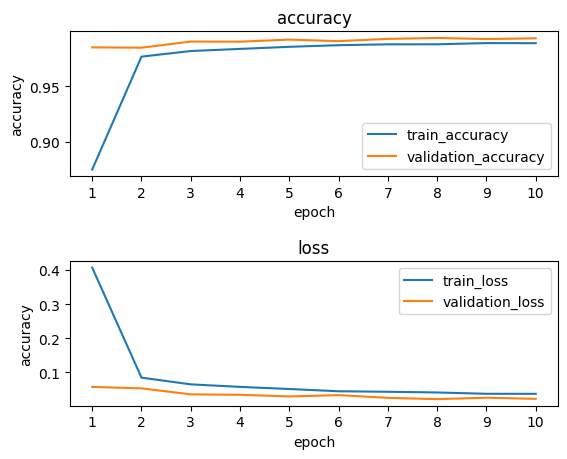

In [78]:
plt.subplot(211)
plt.title("accuracy")
plt.plot(x, history['accuracy'], label="train_accuracy",)
plt.plot(x, history['val_accuracy'], label="validation_accuracy")
plt.xticks(x)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout(pad=3)

plt.subplot(212)
plt.title("loss")
plt.plot(x, history['loss'], label="train_loss")
plt.plot(x, history['val_loss'], label="validation_loss")
plt.xticks(x)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [79]:
model.evaluate(x_test, y_test)

1438/1438 [==============================] - 3s 2ms/step - loss: 0.0235 - accuracy: 0.9934


[0.023456929251551628, 0.9934136271476746]

In [80]:
y_pred = np.array([ np.argmax(i) for i in model.predict(x_test) ])

1438/1438 [==============================] - 2s 2ms/step


In [81]:
print(classification_report(y_test, y_pred, target_names=encoding_maps))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99      1744
           B       1.00      1.00      1.00      1844
           C       1.00      1.00      1.00      1808
           D       1.00      1.00      1.00      1742
           E       0.99      1.00      1.00      1768
           F       1.00      1.00      1.00      1771
           G       1.00      1.00      1.00      1766
           H       1.00      1.00      1.00      1801
           I       0.99      0.98      0.99      1723
           J       0.99      1.00      1.00      1759
           K       1.00      1.00      1.00      1770
           L       1.00      1.00      1.00      1802
           M       0.95      1.00      0.97      1552
           N       0.99      0.92      0.96      1068
           O       1.00      0.99      1.00      1728
           P       1.00      1.00      1.00      1766
           Q       1.00      1.00      1.00      1723
           R       1.00    

In [82]:
from matplotlib import pyplot as plt

Text(158.22222222222223, 0.5, 'True')

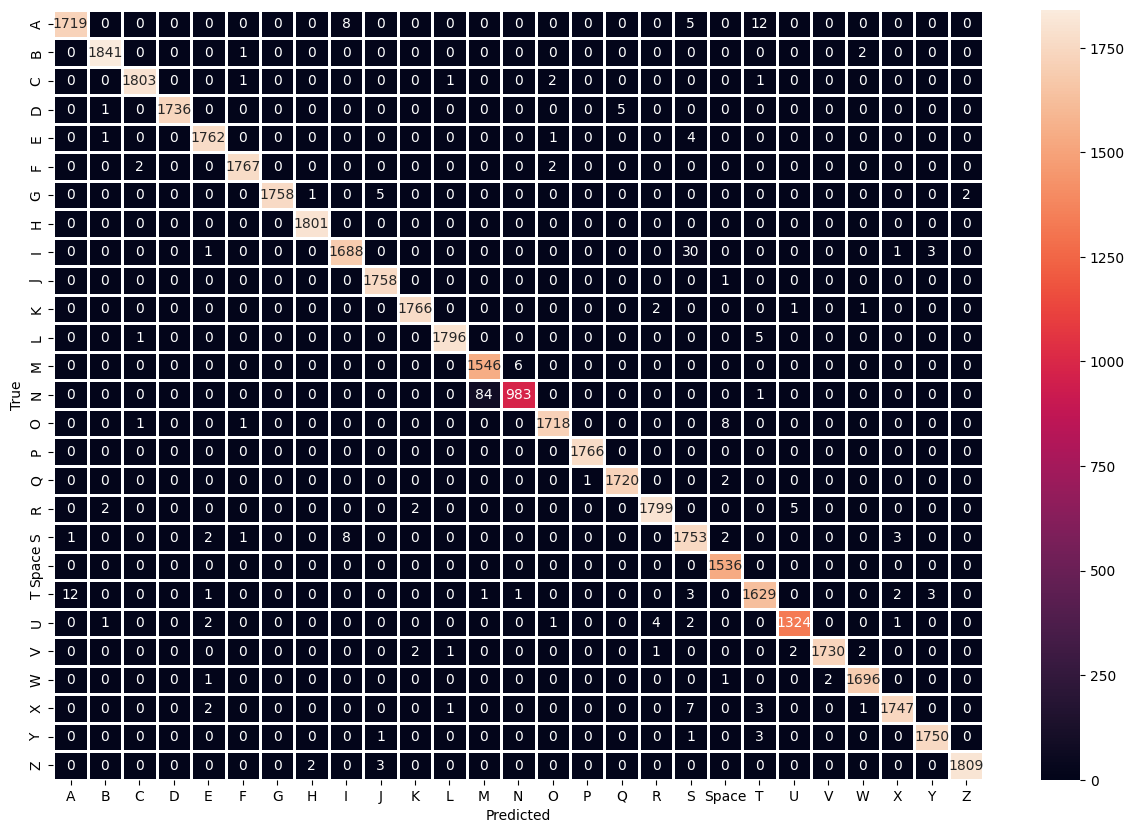

In [83]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=list(encoding_maps.keys()), yticklabels=list(encoding_maps.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')

<h1>Cross Validation</h1>

In [84]:
from sklearn.model_selection import KFold

In [85]:
def evaluate(model, x_train, x_test, y_train, y_test):
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, verbose=False).history
    err, acc = model.evaluate(x_test, y_test)
    print(f"accuracy: {acc}")
    print()


In [86]:
kf = KFold(n_splits=10, shuffle=True)
kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [87]:
for train_idx, test_idx in kf.split(x_data, y_data):
    x_train, x_test = x_data[train_idx], x_data[test_idx]
    y_train, y_test = y_data[train_idx], y_data[test_idx]
    evaluate(Sequential(layers), x_train, x_test, y_train, y_test)


480/480 [==============================] - 2s 3ms/step - loss: 0.0119 - accuracy: 0.9960
accuracy: 0.9959569573402405

480/480 [==============================] - 1s 2ms/step - loss: 0.0148 - accuracy: 0.9955
accuracy: 0.9955005049705505

480/480 [==============================] - 1s 2ms/step - loss: 0.0146 - accuracy: 0.9956
accuracy: 0.9955657124519348

480/480 [==============================] - 2s 3ms/step - loss: 0.0129 - accuracy: 0.9961
accuracy: 0.996087372303009

480/480 [==============================] - 1s 2ms/step - loss: 0.0154 - accuracy: 0.9953
accuracy: 0.9953048825263977

480/480 [==============================] - 1s 2ms/step - loss: 0.0130 - accuracy: 0.9957
accuracy: 0.9956958293914795

480/480 [==============================] - 1s 2ms/step - loss: 0.0092 - accuracy: 0.9967
accuracy: 0.9967392683029175

480/480 [==============================] - 1s 2ms/step - loss: 0.0130 - accuracy: 0.9962
accuracy: 0.9962175488471985

480/480 [==============================] - 1s 2ms